### Modeling DAQUAR
* [Dataset](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/vision-and-language/visual-turing-challenge)

* [Original Paper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://proceedings.neurips.cc/paper_files/paper/2014/file/d516b13671a4179d9b7b458a6ebdeb92-Paper.pdf)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/daquar/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['image_id'], inplace=True)
df.head()

,question,answer,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,what is on the right side of the black telepho...,desk,train,-0.034118,0.00993,-0.024554,0.060827,-0.00711,0.000265,-0.007287,...,0.009015,-0.010106,0.043033,-0.003312,-0.027812,0.009433,0.032928,0.020334,-0.013321,0.029527
1,what is in front of the white door on the left...,telephone,train,-0.034118,0.00993,-0.024554,0.060827,-0.00711,0.000265,-0.007287,...,0.004590,0.004839,0.043577,0.056432,-0.047448,0.016236,0.015645,-0.048516,0.026294,-0.002189
2,what is on the desk in the image3 ?,"book, scissor, papers, tape_dispenser",train,-0.034118,0.00993,-0.024554,0.060827,-0.00711,0.000265,-0.007287,...,0.013225,0.001205,0.034056,0.045491,-0.041755,0.030319,0.002640,-0.023645,0.010350,-0.001730
3,what is the largest brown objects in this imag...,carton,train,-0.034118,0.00993,-0.024554,0.060827,-0.00711,0.000265,-0.007287,...,0.035328,0.009456,0.036832,0.042338,-0.039669,0.027131,-0.021927,-0.060768,-0.014135,-0.002478
4,what color is the chair in front of the white ...,red,train,-0.034118,0.00993,-0.024554,0.060827,-0.00711,0.000265,-0.007287,...,-0.020662,-0.033852,0.057963,0.008730,-0.051158,0.016421,0.011833,-0.042573,0.004175,0.012011


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'answer'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (6795, 1027)
Test Shape: (5673, 1027)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = True

Training Early Fusion Model:
Model Memory Usage: 0.75 MB
The number of parameters of the model are: 195827


STAGE:2024-02-07 17:05:22 29277:29277 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.0180
Epoch 1/15 - Training Time: 0.83 seconds | Inference Time: 0.52 seconds
Epoch 2/15 - Test Accuracy: 0.0180
Epoch 2/15 - Training Time: 0.65 seconds | Inference Time: 0.47 seconds
Epoch 3/15 - Test Accuracy: 0.0180
Epoch 3/15 - Training Time: 0.63 seconds | Inference Time: 0.51 seconds
Epoch 4/15 - Test Accuracy: 0.0180
Epoch 4/15 - Training Time: 0.61 seconds | Inference Time: 0.49 seconds
Epoch 5/15 - Test Accuracy: 0.0180
Epoch 5/15 - Training Time: 0.67 seconds | Inference Time: 0.51 seconds
Epoch 6/15 - Test Accuracy: 0.0180
Epoch 6/15 - Training Time: 0.62 seconds | Inference Time: 0.51 seconds
Epoch 7/15 - Test Accuracy: 0.0180
Epoch 7/15 - Training Time: 0.66 seconds | Inference Time: 0.50 seconds
Epoch 8/15 - Test Accuracy: 0.0180
Epoch 8/15 - Training Time: 0.63 seconds | Inference Time: 0.52 seconds
Epoch 9/15 - Test Accuracy: 0.0180
Epoch 9/15 - Training Time: 0.66 seconds | Inference Time: 0.53 seconds
Epoch 10/15 - Test Accuracy: 0.0192
E

STAGE:2024-02-07 17:05:41 29277:29277 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 17:05:42 29277:29277 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         6.50%     943.954ms        45.37%        6.593s       4.108ms    -593.08 Mb    -790.60 Mb          1605  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        37.37%        5.431s        37.93%        5.512s       1.856ms       1.06 Gb       1.06 Gb          2970  
                              Optimizer.step#AdamW.step         4.44%     645.531ms        20.90%        3.038s       1.893ms       1.49 Mb      -2.31

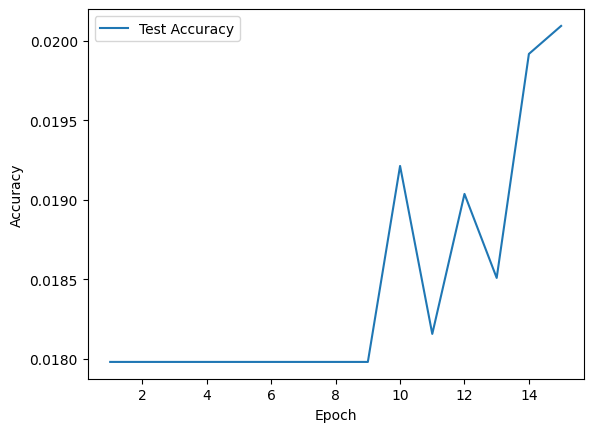

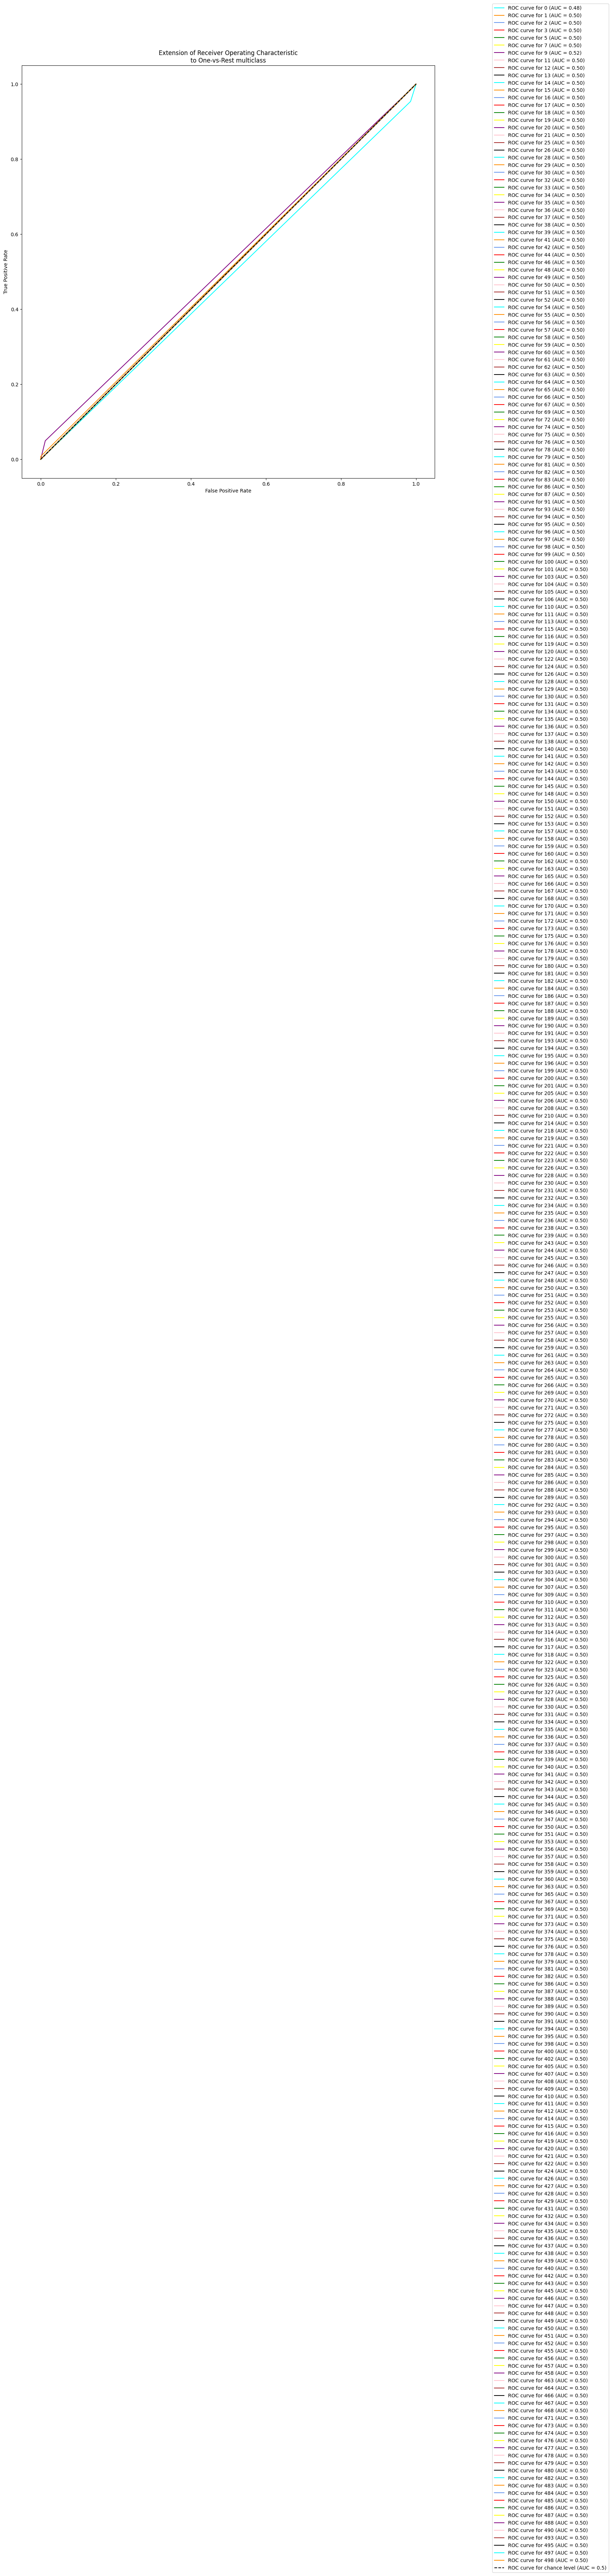

              precision    recall  f1-score   support

           0       0.04      0.95      0.07       217
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.17      0.05      0.08       282
          11       0.00      0.00      0.00       143
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00    

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 130291


STAGE:2024-02-07 17:07:30 29277:29277 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.0180
Epoch 1/15 - Training Time: 1.05 seconds | Inference Time: 0.72 seconds
Epoch 2/15 - Test Accuracy: 0.0180
Epoch 2/15 - Training Time: 1.05 seconds | Inference Time: 0.71 seconds
Epoch 3/15 - Test Accuracy: 0.0180
Epoch 3/15 - Training Time: 0.97 seconds | Inference Time: 0.69 seconds
Epoch 4/15 - Test Accuracy: 0.0180
Epoch 4/15 - Training Time: 1.11 seconds | Inference Time: 0.77 seconds
Epoch 5/15 - Test Accuracy: 0.0180
Epoch 5/15 - Training Time: 1.02 seconds | Inference Time: 0.74 seconds
Epoch 6/15 - Test Accuracy: 0.0180
Epoch 6/15 - Training Time: 1.03 seconds | Inference Time: 0.65 seconds
Epoch 7/15 - Test Accuracy: 0.0182
Epoch 7/15 - Training Time: 0.87 seconds | Inference Time: 0.64 seconds
Epoch 8/15 - Test Accuracy: 0.0183
Epoch 8/15 - Training Time: 0.93 seconds | Inference Time: 0.66 seconds
Epoch 9/15 - Test Accuracy: 0.0183
Epoch 9/15 - Training Time: 0.96 seconds | Inference Time: 0.66 seconds
Epoch 10/15 - Test Accuracy: 0.0183
E

STAGE:2024-02-07 17:07:57 29277:29277 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 17:07:57 29277:29277 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.94%        1.709s        62.35%       11.918s       4.054ms    -763.04 Mb      -1.25 Gb          2940  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        37.13%        7.098s        37.58%        7.183s       2.419ms       1.06 Gb       1.06 Gb          2970  
                              Optimizer.step#AdamW.step         4.82%     921.214ms        22.19%        4.241s       2.642ms    1017.94 Kb      -1.53

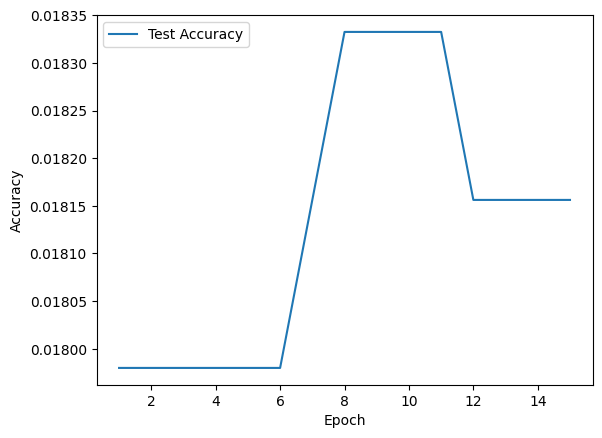

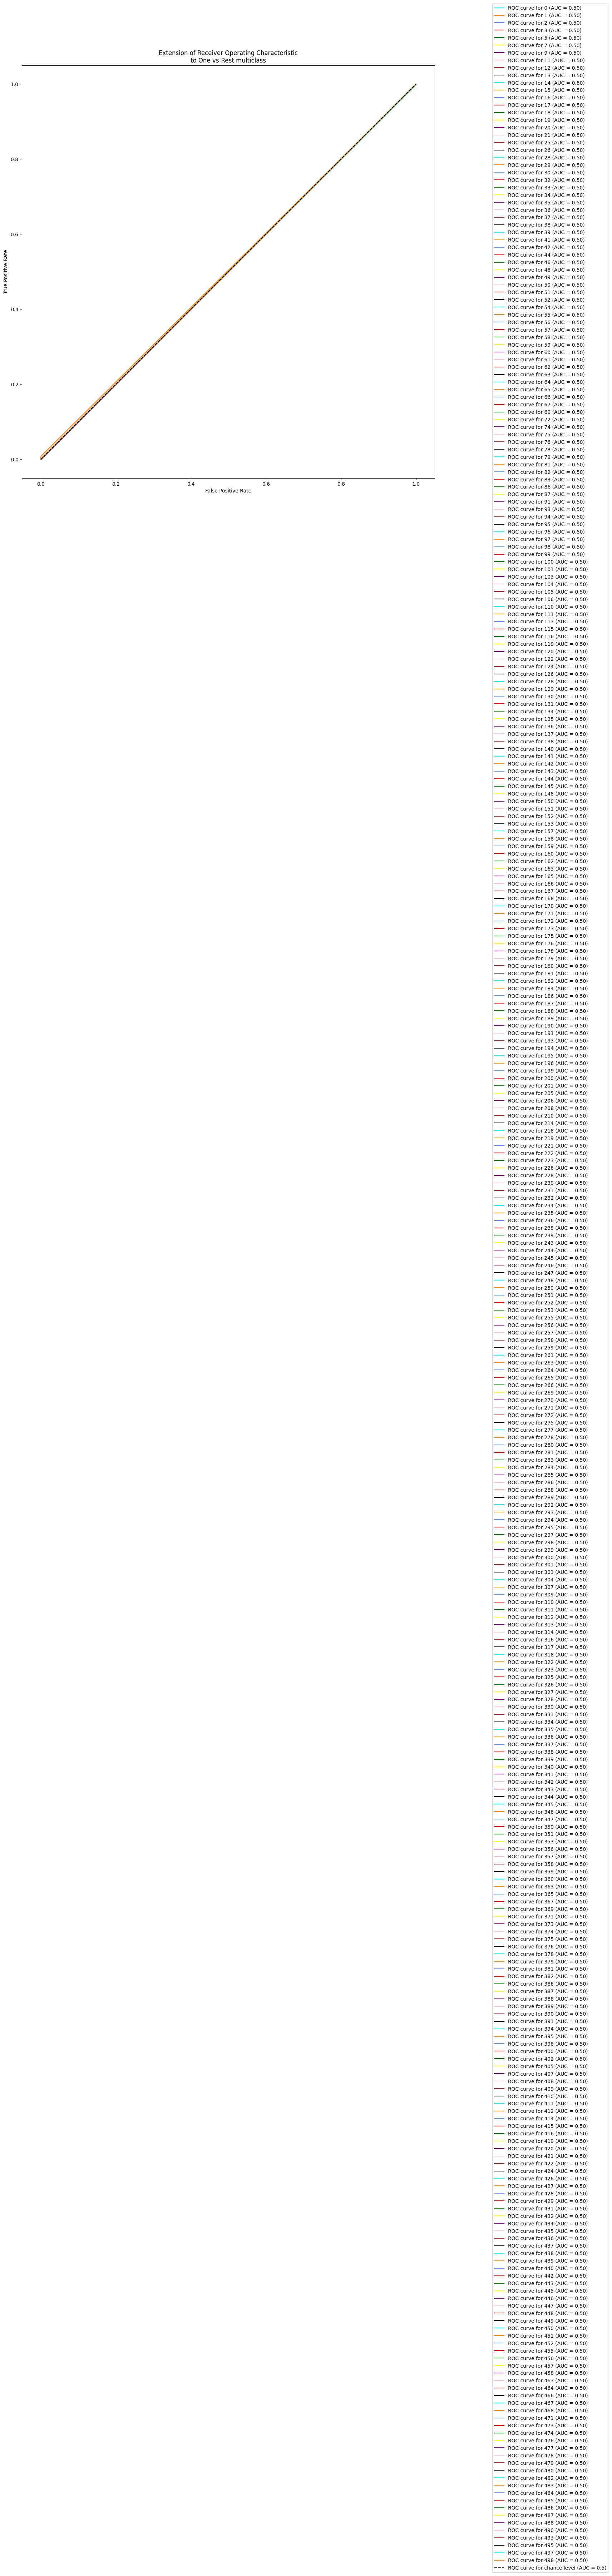

              precision    recall  f1-score   support

           0       0.04      1.00      0.07       217
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00       282
          11       0.25      0.01      0.01       143
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00    

In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)